# Predicting house prices with linear regression

Let's go back to our Boston housing prices dataset

In [1]:
import pandas as pd

boston_housing = pd.read_csv('datasets/boston.csv')

Linear regression is an algorithm that tries to fit a straight line(or hyperplane when our data have more than two dimensions) into a set of datapoints in order to predict the value of one feature from the other ones.

In our previous example, a straight line was shown over the data points that represent the combination of house prices and number of rooms:

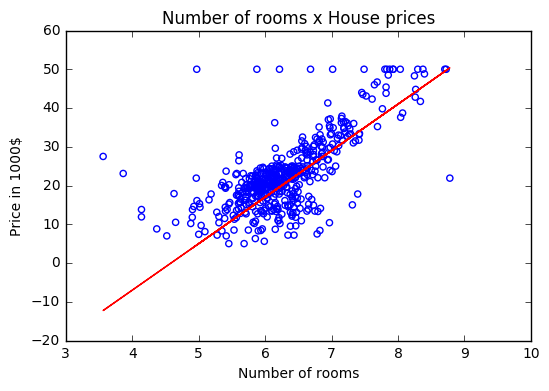

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

rm_line = [(12*x_val-55) for x_val in boston_housing.rm]
plt.title('Number of rooms x House prices')
plt.xlabel('Number of rooms')
plt.ylabel('Price in 1000$')
plt.scatter(boston_housing.rm, boston_housing.medv, color='blue', marker='o', facecolors='none')
plt.plot(boston_housing.rm, rm_line, color='red')
plt.show()

## Using scikit-learn to find the best line fit

*scikit-learn* is a well-known python library that provides the implementation of many machine learning algorithms.
The general usage pattern os scikit-learn is the following:
* Instantiate the model:

In [3]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

* Fit the data into the model:

In [4]:
# This is a quirk required by sklearn when we grab values from a pandas DataFrame.
# It's only needed when the data has a single example or a single feature(our case).
X = boston_housing.rm.values.reshape(-1, 1)
y = boston_housing.medv.values.reshape(-1, 1)

lr = lr.fit(X, y)

* Predict values from the learned model:

In [5]:
lr.predict(6)

array([[ 19.94203311]])

We can plot the fitted line by superimposing a scatterplot containing our data and a plot chart containing the predicted values from the model.

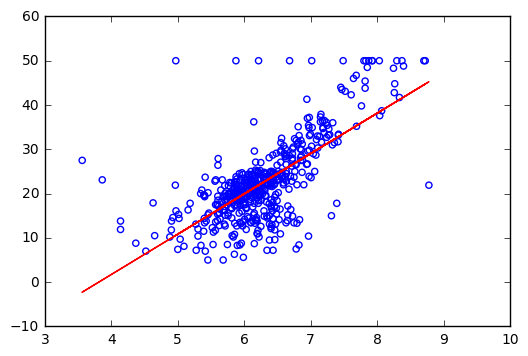

In [6]:
plt.scatter(boston_housing.rm, boston_housing.medv, color='blue', marker='o', facecolors='none')
plt.plot(X, lr.predict(X), color='red')
plt.show()

The model coefficients can be retrieved by inspecting its properties.

In [7]:
lr.coef_, lr.intercept_

(array([[ 9.10210898]]), array([-34.67062078]))

## Evaluating the model

Once a model is trained, it's important to assess how well it represents our data. Scikit-learn has a package called *metrics* with calculations that estimate the error associated to a model: the closer this value is to zero, the better.

In [8]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y, lr.predict(X))

43.60055177116957

If we include more features into the model, its error *in the training data set* will decrease:

In [9]:
X = boston_housing[['rm', 'crim']].values

lr2 = LinearRegression().fit(X, y)
mean_squared_error(y, lr2.predict(X))

38.667603245036332

The model based in the number of rooms and the per-capita crime rate lowered the error in this dataste. This, however, could be a step towards *overfitting* our model. We'll see how to mitigate this effect in the last course section.